# Modelling - anxiety

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
anxiety_data = pd.read_csv("anxiety_data.csv")

### I will do the first model for anxiety, without balancing. To see how it is.

In [3]:
X_anxiety = anxiety_data.drop("severeness_level_anxiety", axis = 1)
y_anxiety = anxiety_data["severeness_level_anxiety"]

In [4]:
X_train_anx, X_test_anx, y_train_anx, y_test_anx = train_test_split(X_anxiety, y_anxiety, test_size = 0.20, random_state = 123)

In [5]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_anx)
X_anxiety_train_scaled = std_scaler.transform(X_train_anx)
X_anxiety_test_scaled = std_scaler.transform(X_test_anx)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.979470,0.979879
1,Precision,0.960112,0.959870
2,Recall,0.703047,0.705341


Confusion matrix for the train set
[[   80   653     0]
 [    0  4804     0]
 [    0     0 26270]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


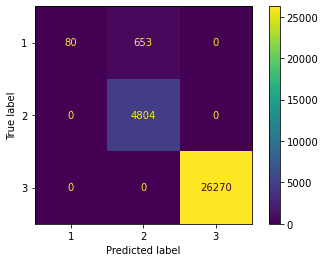



Confusion matrix for the test set
[[  21  160    0]
 [   0 1169    0]
 [   0    0 6602]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


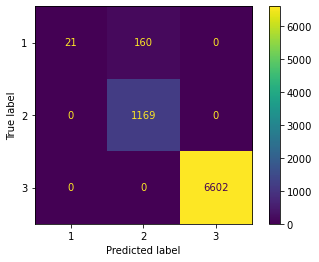

In [6]:
log_model = LogisticRegression(multi_class='ovr', max_iter = 5000) 
log_model.fit(X_anxiety_train_scaled, y_train_anx)
y_pred_train_log_anx = log_model.predict(X_anxiety_train_scaled)
y_pred_test_log_anx = log_model.predict(X_anxiety_test_scaled)

performance_log_anx = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx, y_pred_train_log_anx),
                                         precision_score(y_train_anx, y_pred_train_log_anx, average = "macro"),
                                         recall_score(y_train_anx, y_pred_train_log_anx, average = "macro")],
                               'Test': [accuracy_score(y_test_anx, y_pred_test_log_anx),
                                        precision_score(y_test_anx, y_pred_test_log_anx, average = "macro"),
                                        recall_score(y_test_anx, y_pred_test_log_anx, average = "macro")]})

display(performance_log_anx)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx,y_pred_train_log_anx))
plot_confusion_matrix(log_model,X_anxiety_train_scaled,y_train_anx, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx, y_pred_test_log_anx))
plot_confusion_matrix(log_model,X_anxiety_test_scaled,y_test_anx, values_format = 'd')
plt.show()

#### KNN

,Error_metric,Train,Test
0,Accuracy,0.930141,0.899019
1,Precision,0.755982,0.676278
2,Recall,0.838495,0.764738


Confusion matrix for the train set
[[  493   240     0]
 [  378  4324   102]
 [   13  1489 24768]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


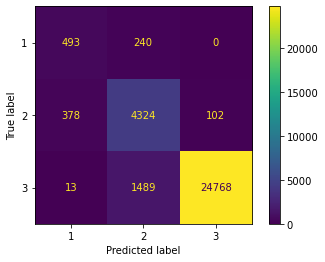



Confusion matrix for the test set
[[  96   85    0]
 [ 129  988   52]
 [   2  535 6065]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


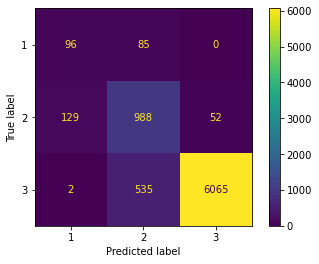

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_anxiety_train_scaled, y_train_anx)
y_pred_train_log_anx = knn_model.predict(X_anxiety_train_scaled)
y_pred_test_log_anx = knn_model.predict(X_anxiety_test_scaled)

performance_log_anx = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx, y_pred_train_log_anx),
                                         precision_score(y_train_anx, y_pred_train_log_anx, average = "macro"),
                                         recall_score(y_train_anx, y_pred_train_log_anx, average = "macro")],
                               'Test': [accuracy_score(y_test_anx, y_pred_test_log_anx),
                                        precision_score(y_test_anx, y_pred_test_log_anx, average = "macro"),
                                        recall_score(y_test_anx, y_pred_test_log_anx, average = "macro")]})

display(performance_log_anx)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx,y_pred_train_log_anx))
plot_confusion_matrix(knn_model,X_anxiety_train_scaled,y_train_anx, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx, y_pred_test_log_anx))
plot_confusion_matrix(knn_model,X_anxiety_test_scaled,y_test_anx, values_format = 'd')
plt.show()

#### Decision tree

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.891816,0.893989
1,Precision,0.523336,0.523036
2,Recall,0.575608,0.579741


Confusion matrix for the train set
[[    0     0     0]
 [  733  3804  1708]
 [    0  1000 24562]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


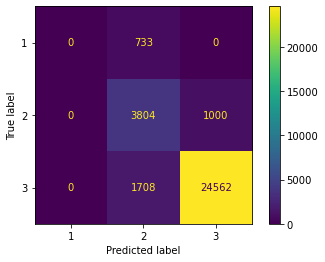



Confusion matrix for the test set
[[   0    0    0]
 [ 181  941  434]
 [   0  228 6168]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


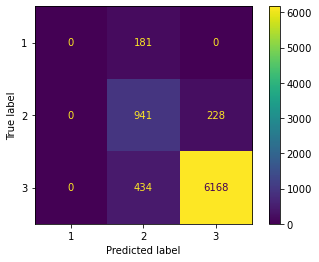

In [8]:
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train_anx, y_train_anx)

y_pred_train_dt_anx = dt.predict(X_train_anx)
y_pred_test_dt_anx = dt.predict(X_test_anx)


performance_df_anx = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx, y_pred_train_dt_anx),
                                         precision_score(y_train_anx, y_pred_train_dt_anx, average = "macro"),
                                         recall_score(y_train_anx, y_pred_train_dt_anx, average = "macro")],
                               'Test': [accuracy_score(y_test_anx, y_pred_test_dt_anx),
                                        precision_score(y_test_anx, y_pred_test_dt_anx, average = "macro"),
                                        recall_score(y_test_anx, y_pred_test_dt_anx, average = "macro")]})

display(performance_df_anx)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx,y_pred_train_dt_anx).T)
plot_confusion_matrix(dt,X_train_anx,y_train_anx, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx,y_pred_test_dt_anx).T)
plot_confusion_matrix(dt,X_test_anx,y_test_anx, values_format = 'd')
plt.show()

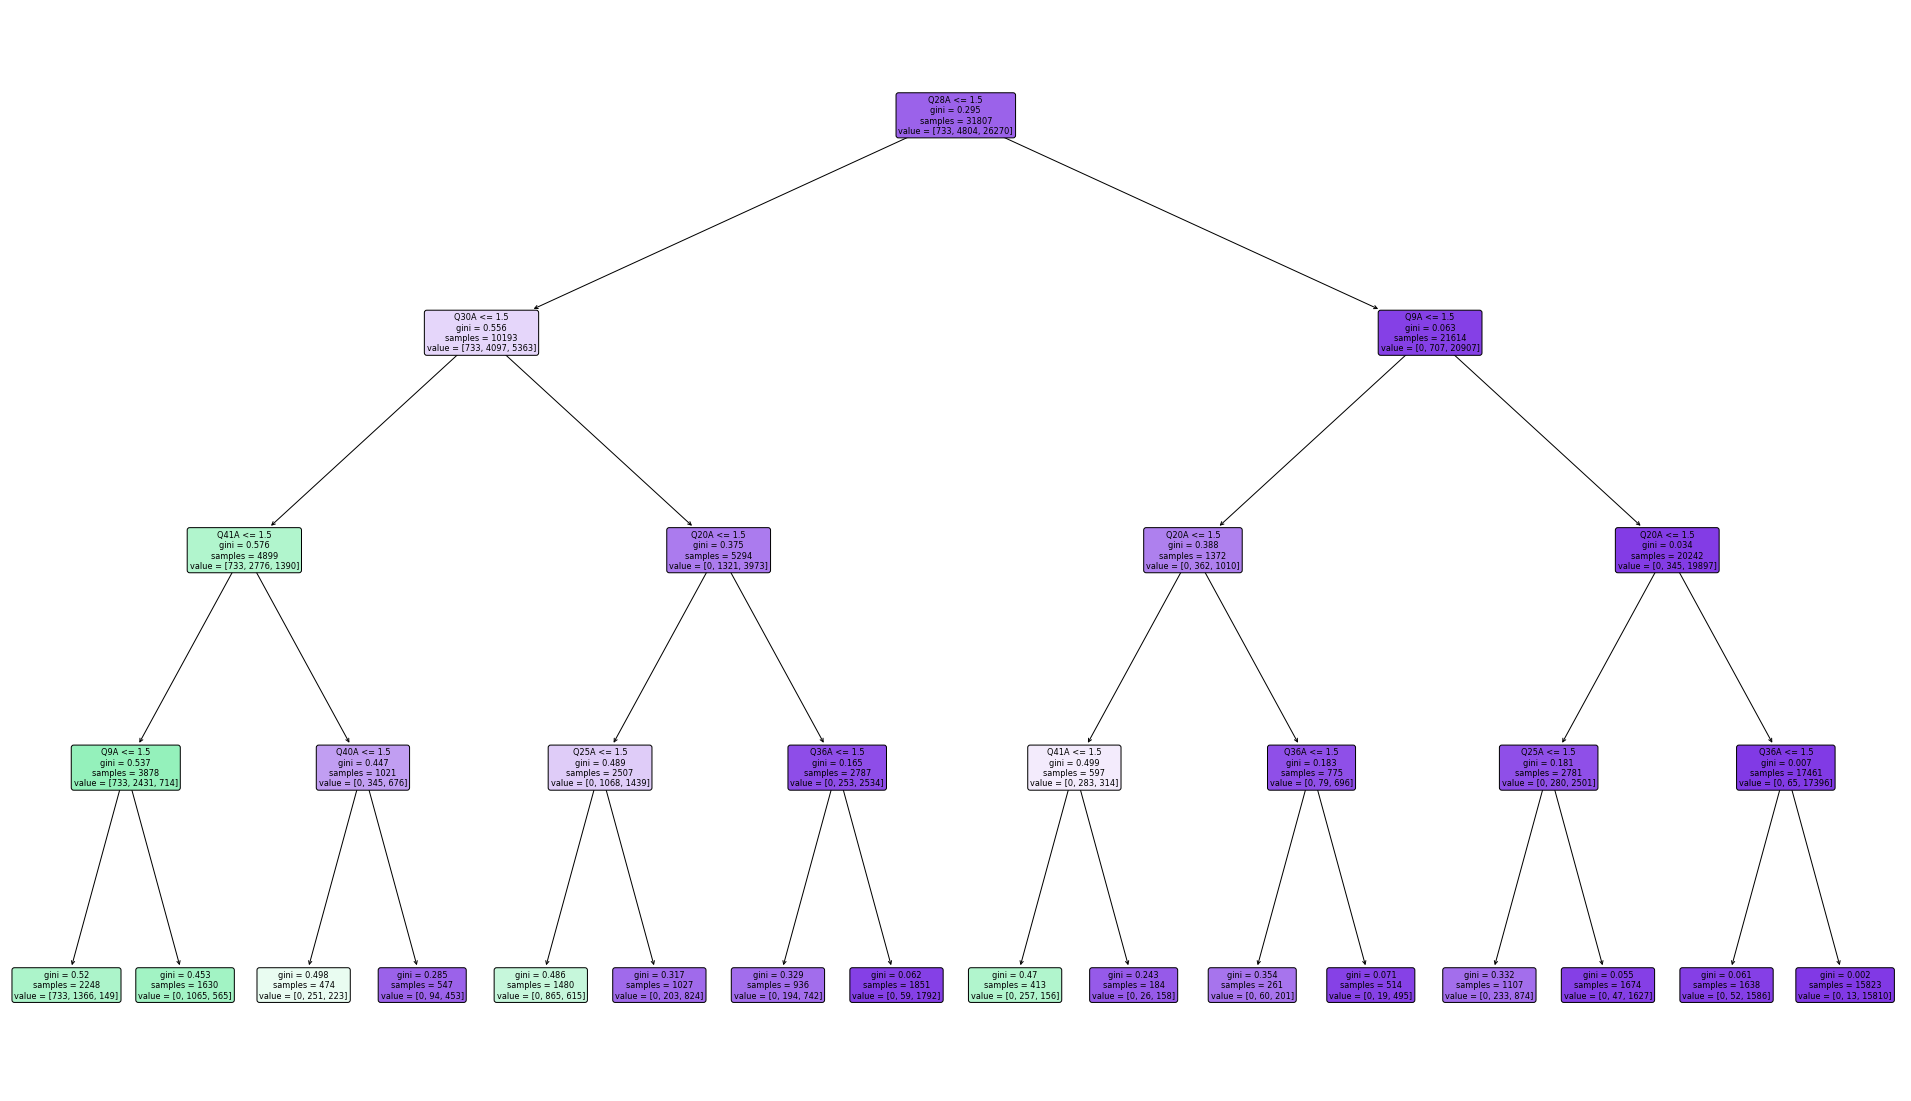

In [9]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_anxiety.columns)
plt.show()

#### Random forest

In [10]:
# Applying the random forest.
# max_features="sqrt" - this didn't change the final scores.
# Max_depth - less in better, if I have higher nr the scores are more than 90, maybe too good?
# Nr of estimators - tried with 30, 20, 50, 40 - scores didn't change at all.

clf = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_anx, y_train_anx)
print(clf.score(X_train_anx, y_train_anx))
print(clf.score(X_test_anx, y_test_anx))

0.8931996101487094
0.8983903420523138


In [11]:
# Cross validation, accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0)
cross_val_scores_anx = cross_val_score(clf, X_train_anx, y_train_anx, cv=5)
cross_val_scores_anx

array([0.90993398, 0.90961962, 0.90583242, 0.9152649 , 0.90834774])

In [12]:
np.mean(cross_val_scores_anx)

0.9097997310611697

### Solving the imbalancement for anxiety

In [13]:
# Checking the imbalance
# Classes: 1 (moderate), 2 (severe), 3 (extremely severe)

y_anxiety.value_counts()

3    32872
2     5973
1      914
Name: severeness_level_anxiety, dtype: int64

In [14]:
# As the imbalance is very big, 
# I will downsample class 3 and upsample class 1.

class_1_anx = anxiety_data[anxiety_data["severeness_level_anxiety"] == 1]
class_2_anx = anxiety_data[anxiety_data["severeness_level_anxiety"] == 2]
class_3_anx = anxiety_data[anxiety_data["severeness_level_anxiety"] == 3]

In [15]:
class_3_anx_down = class_3_anx.sample(len(class_2_anx,))
class_1_anx_up = class_1_anx.sample(len(class_2_anx), replace=True)

In [16]:
anxiety_data_balanced = pd.concat([class_1_anx_up, class_2_anx, class_3_anx_down], axis=0)

anxiety_data_balanced = anxiety_data_balanced.sample(frac=1)
anxiety_data_balanced["severeness_level_anxiety"].value_counts() 

3    5973
1    5973
2    5973
Name: severeness_level_anxiety, dtype: int64

In [17]:
# Upsampling with smote

smote = SMOTE()

In [18]:
X_anxiety_sm, y_anxiety_sm = smote.fit_resample(X_anxiety, y_anxiety)
y_anxiety_sm.value_counts()

3    32872
2    32872
1    32872
Name: severeness_level_anxiety, dtype: int64

### Modelling with anxiety data, balanced

In [19]:
# With up and down sampling

In [20]:
X_anx_bal = anxiety_data_balanced.drop("severeness_level_anxiety", axis = 1)
y_anx_bal = anxiety_data_balanced["severeness_level_anxiety"]

In [21]:
X_train_anx_bal, X_test_anx_bal, y_train_anx_bal, y_test_anx_bal = train_test_split(X_anx_bal, y_anx_bal, test_size = 0.20, random_state = 123)

In [22]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_anx_bal)
X_anx_bal_train_scaled = std_scaler.transform(X_train_anx_bal)
X_anx_bal_test_scaled = std_scaler.transform(X_test_anx_bal)

In [23]:
# With smote

X_train_anx_sm, X_test_anx_sm, y_train_anx_sm, y_test_anx_sm = train_test_split(X_anxiety_sm, y_anxiety_sm, test_size = 0.20, random_state = 123)

In [24]:
std_scaler = StandardScaler().fit(X_train_anx_sm)
X_anx_sm_train_scaled = std_scaler.transform(X_train_anx_sm)
X_anx_sm_test_scaled = std_scaler.transform(X_test_anx_sm)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.999023,0.998884
1,Precision,0.999020,0.998913
2,Recall,0.999025,0.998880


Confusion matrix for the train set
[[4750    0    0]
 [  11 4771    0]
 [   0    3 4800]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


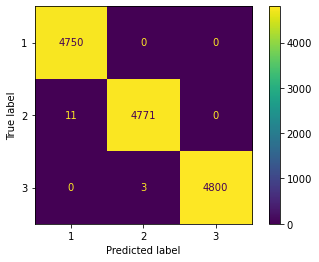



Confusion matrix for the test set
[[1223    0    0]
 [   4 1187    0]
 [   0    0 1170]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


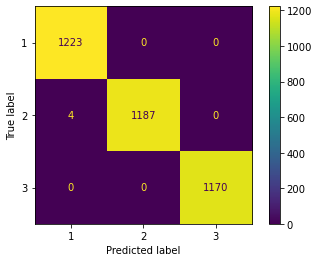

In [25]:
log_model = LogisticRegression(multi_class='ovr') 
log_model.fit(X_anx_bal_train_scaled, y_train_anx_bal)
y_pred_train_log_anx_bal = log_model.predict(X_anx_bal_train_scaled)
y_pred_test_log_anx_bal = log_model.predict(X_anx_bal_test_scaled)

performance_log_anx_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_bal, y_pred_train_log_anx_bal),
                                         precision_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro"),
                                         recall_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_bal, y_pred_test_log_anx_bal),
                                        precision_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro"),
                                        recall_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro")]})

display(performance_log_anx_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_bal,y_pred_train_log_anx_bal))
plot_confusion_matrix(log_model,X_anx_bal_train_scaled,y_train_anx_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_bal, y_pred_test_log_anx_bal))
plot_confusion_matrix(log_model,X_anx_bal_test_scaled,y_test_anx_bal, values_format = 'd')
plt.show()

#### KNN

,Error_metric,Train,Test
0,Accuracy,0.999023,0.998884
1,Precision,0.999020,0.998913
2,Recall,0.999025,0.998880


Confusion matrix for the train set
[[4750    0    0]
 [2059 2723    0]
 [  36  747 4020]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


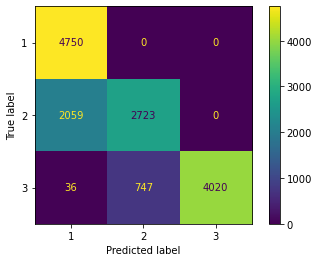



Confusion matrix for the test set
[[1223    0    0]
 [ 609  582    0]
 [   8  228  934]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


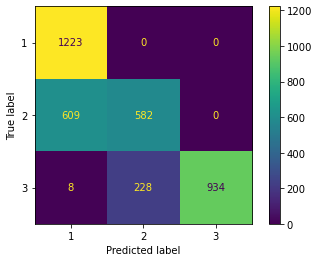

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_anx_bal_train_scaled, y_train_anx_bal)
y_pred_train_log_anx_bal = knn_model.predict(X_anx_bal_train_scaled)
y_pred_test_log_anx_bal = knn_model.predict(X_anx_bal_test_scaled)

performance_log_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_bal, y_pred_train_log_anx_bal),
                                         precision_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro"),
                                         recall_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_bal, y_pred_test_log_anx_bal),
                                        precision_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro"),
                                        recall_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro")]})

display(performance_log_anx_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_bal,y_pred_train_log_anx_bal))
plot_confusion_matrix(knn_model,X_anx_bal_train_scaled,y_train_anx_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_bal, y_pred_test_log_anx_bal))
plot_confusion_matrix(knn_model,X_anx_bal_test_scaled,y_test_anx_bal, values_format = 'd')
plt.show()

#### Decision tree

,Error_metric,Train,Test
0,Accuracy,0.910917,0.909040
1,Precision,0.912203,0.910157
2,Recall,0.911172,0.907921


Confusion matrix for the train set
[[4750  480    7]
 [   0 4117  605]
 [   0  185 4191]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


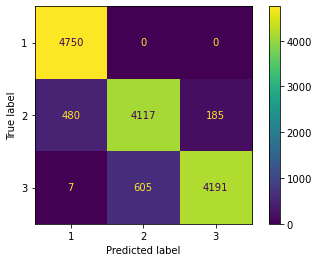



Confusion matrix for the test set
[[1223  104    4]
 [   0 1032  163]
 [   0   55 1003]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


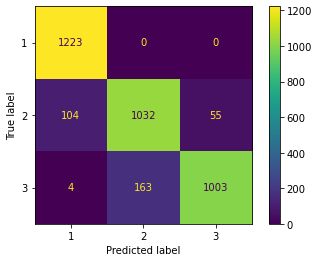

In [27]:
# After up and down sampling

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_anx_bal, y_train_anx_bal)

y_pred_train_dt_anx_bal = dt.predict(X_train_anx_bal)
y_pred_test_dt_anx_bal = dt.predict(X_test_anx_bal)


performance_df_anx_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_bal, y_pred_train_dt_anx_bal),
                                         precision_score(y_train_anx_bal, y_pred_train_dt_anx_bal, average = "macro"),
                                         recall_score(y_train_anx_bal, y_pred_train_dt_anx_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_bal, y_pred_test_dt_anx_bal),
                                        precision_score(y_test_anx_bal, y_pred_test_dt_anx_bal, average = "macro"),
                                        recall_score(y_test_anx_bal, y_pred_test_dt_anx_bal, average = "macro")]})

display(performance_df_anx_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_bal,y_pred_train_dt_anx_bal).T)
plot_confusion_matrix(dt,X_train_anx_bal,y_train_anx_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_bal,y_pred_test_dt_anx_bal).T)
plot_confusion_matrix(dt,X_test_anx_bal,y_test_anx_bal, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.876287,0.875330
1,Precision,0.890972,0.887750
2,Recall,0.876004,0.876464


Confusion matrix for the train set
[[26446  7447    12]
 [    0 17832  1337]
 [    0   964 24854]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


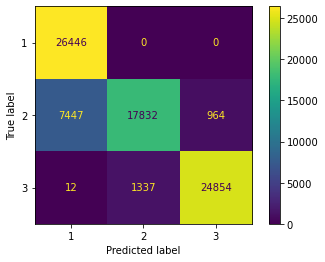

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




Confusion matrix for the test set
[[6426 1826    1]
 [   0 4544  373]
 [   0  259 6295]]


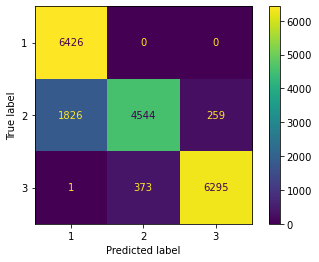

In [28]:
# After SMOTE

dt = DecisionTreeClassifier(max_depth=6)

dt.fit(X_train_anx_sm, y_train_anx_sm)

y_pred_train_dt_anx_sm = dt.predict(X_train_anx_sm)
y_pred_test_dt_anx_sm = dt.predict(X_test_anx_sm)


performance_df_anx_sm = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_sm, y_pred_train_dt_anx_sm),
                                         precision_score(y_train_anx_sm, y_pred_train_dt_anx_sm, average = "macro"),
                                         recall_score(y_train_anx_sm, y_pred_train_dt_anx_sm, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_sm, y_pred_test_dt_anx_sm),
                                        precision_score(y_test_anx_sm, y_pred_test_dt_anx_sm, average = "macro"),
                                        recall_score(y_test_anx_sm, y_pred_test_dt_anx_sm, average = "macro")]})

display(performance_df_anx_sm)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_sm,y_pred_train_dt_anx_sm).T)
plot_confusion_matrix(dt,X_train_anx_sm,y_train_anx_sm, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_sm,y_pred_test_dt_anx_sm).T)
plot_confusion_matrix(dt,X_test_anx_sm,y_test_anx_sm, values_format = 'd')
plt.show()

#### Random forest

In [29]:
clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_anx_bal, y_train_anx_bal)
print(clf.score(X_train_anx_bal, y_train_anx_bal))
print(clf.score(X_test_anx_bal, y_test_anx_bal))

0.911545169166376
0.9076450892857143


In [30]:
y_pred_anx = clf.predict(X_test_anx_bal)
y_pred_anx

array([3, 2, 1, ..., 1, 2, 1])

In [31]:
# Getting the precision and recall scores

print(classification_report(y_test_anx_bal,y_pred_anx))
print(accuracy_score(y_test_anx_bal, y_pred_anx))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93      1223
           2       0.88      0.84      0.86      1191
           3       1.00      0.88      0.93      1170

    accuracy                           0.91      3584
   macro avg       0.91      0.91      0.91      3584
weighted avg       0.91      0.91      0.91      3584

0.9076450892857143


In [32]:
# Using cross validation. Receiving accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_anx_bal = cross_val_score(clf, X_train_anx_bal, y_train_anx_bal, cv=5)
cross_val_scores_anx_bal

array([0.91001046, 0.91524241, 0.91314963, 0.91489362, 0.90966167])

In [33]:
np.mean(cross_val_scores_anx_bal)

0.9125915591210324

#### Hyperparameters and grid search

In [34]:
# Setting parameter values for finding out which gives the best model.

param_grid_anx = {
    "n_estimators": [15, 20, 30],
    "min_samples_split": [2, 4],
    "min_samples_leaf" : [1, 2],
    "max_features": ["sqrt"],
    "max_depth": [8],
    }
clf = RandomForestClassifier(random_state=100)

In [35]:
# Setting the grid search.

grid_search_anxiety = GridSearchCV(clf, param_grid_anx, cv=5, return_train_score=True, n_jobs=-1,)

In [36]:
# Applying it.

grid_search_anxiety.fit(X_train_anx_bal,y_train_anx_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [15, 20, 30]},
             return_train_score=True)

In [37]:
# The best parameters?

grid_search_anxiety.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [38]:
# Results for each search

pd.DataFrame(grid_search_anxiety.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.205831,0.000969,0.013797,0.000230,8,sqrt,1,2,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.955842,0.002168,12,0.968434,0.969393,0.965556,0.966167,0.967213,0.967353,0.001413
1,0.280665,0.001635,0.018780,0.004121,8,sqrt,1,2,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.959819,0.001890,8,0.971922,0.974538,0.969829,0.970527,0.969393,0.971242,0.001857
2,0.408807,0.003861,0.022166,0.000752,8,sqrt,1,2,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.962818,0.003030,4,0.973666,0.976892,0.974015,0.973491,0.972358,0.974084,0.001510
3,0.204190,0.003013,0.013110,0.000402,8,sqrt,1,4,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.956610,0.004672,11,0.969742,0.971660,0.966690,0.966952,0.967300,0.968469,0.001931
4,0.264163,0.001320,0.015581,0.000617,8,sqrt,1,4,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.961563,0.004375,5,0.973230,0.974451,0.970963,0.970352,0.970265,0.971852,0.001686
5,0.396331,0.005253,0.022160,0.001008,8,sqrt,1,4,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.963725,0.004255,3,0.974538,0.975235,0.974189,0.971835,0.973230,0.973805,0.001178
6,0.200695,0.004928,0.013668,0.000638,8,sqrt,2,2,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.958284,0.002698,9,0.969131,0.969044,0.966167,0.965295,0.967388,0.967405,0.001527
7,0.273813,0.004647,0.017403,0.001378,8,sqrt,2,2,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.961353,0.003601,6,0.971922,0.971311,0.970963,0.967388,0.970265,0.970370,0.001584
8,0.396155,0.004658,0.020493,0.000554,8,sqrt,2,2,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.963934,0.003478,1,0.973666,0.973491,0.973579,0.971399,0.972619,0.972951,0.000862
9,0.197607,0.001704,0.012314,0.000801,8,sqrt,2,4,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.958284,0.002698,9,0.969131,0.969044,0.966167,0.965295,0.967388,0.967405,0.001527


In [39]:
# Checking the result with cross validation.

clf = RandomForestClassifier(random_state=0, max_depth=8, 
                             min_samples_leaf=1, min_samples_split=4, n_estimators=30, bootstrap=True, oob_score=True)
cross_val_scores_anx = cross_val_score(clf, X_train_anx_bal, y_train_anx_bal, cv=5)
print(np.mean(cross_val_scores_anx))

0.9600279037321242


#### Principal Component Analysis

In [66]:
# First, choosing the nr of components

pca_anx = PCA(n_components=19)
pca_anx_fit = pca_anx.fit(X_anx_bal_train_scaled)

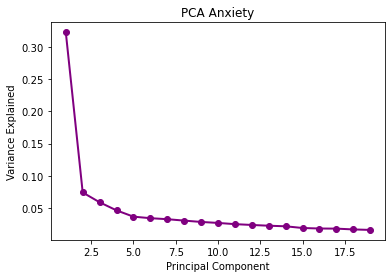

In [67]:
# To see which component is how important

PC_values_anx = np.arange(pca_anx.n_components_) + 1
plt.plot(PC_values_anx, pca_anx.explained_variance_ratio_, 'o-', linewidth=2, color='purple')
plt.title('PCA Anxiety')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [68]:
# Another way, choosing how much information to leave from original

std_scaler = StandardScaler()
X_pca_anx_scaled = std_scaler.fit_transform(X_anx_bal)

In [69]:
X_train_pca_anx, X_test_pca_anx, y_train_pca_anx, y_test_pca_anx = train_test_split(X_pca_anx_scaled, y_anx_bal, test_size = 0.20, random_state = 123)

In [70]:
# Another way
# Set the variance %.
# Leave 95% of information.

pca_anxi = PCA(.85)

In [71]:
# Fit the training set.

X_pca_anx_fitted = pca_anxi.fit_transform(X_train_pca_anx)

In [72]:
# How many principal components to get 95% variance?

X_pca_anx_fitted.shape

(14335, 19)

In [73]:
# How much variance explained by which component

pca_anxi.explained_variance_ratio_

array([0.32366532, 0.07359173, 0.05867494, 0.04604039, 0.03610835,
       0.03373486, 0.03220738, 0.02997686, 0.02792574, 0.02639303,
       0.02443361, 0.02318755, 0.02204349, 0.02116613, 0.01849424,
       0.01771798, 0.01752056, 0.01626434, 0.01554972])

In [74]:
# Model after pca

X_train_pca_anx_, X_test_pca_anx_, y_train_pca_anx_, y_test_pca_anx_ = train_test_split(X_pca_anx_fitted, y_train_pca_anx, test_size = 0.20, random_state = 123)

In [75]:
model = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=77, bootstrap=True, oob_score=True)
model.fit(X_train_pca_anx_, y_train_pca_anx_)
model.score(X_test_pca_anx_, y_test_pca_anx_)

0.9291942797349145

#### Feature importance

In [50]:
feature_names_anxiety = X_train_anx_bal.columns
feature_names_anxiety = list(feature_names_anxiety)

In [51]:
clf.fit(X_train_anx_bal, y_train_anx_bal)

RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=30,
                       oob_score=True, random_state=0)

In [52]:
anxiety_feature_df = pd.DataFrame(list(zip(feature_names_anxiety, clf.feature_importances_)))
anxiety_feature_df.columns = ['columns_name', 'score_feature_importance']
anxiety_feature_df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
3,Q9A,0.216559
12,Q40A,0.119480
6,Q20A,0.104608
0,Q2A,0.073154
9,Q28A,0.072723
10,Q30A,0.065604
11,Q36A,0.058026
8,Q25A,0.056978
2,Q7A,0.055869
13,Q41A,0.038104


#### Model with selected features

In [53]:
final_features_anxiety = anxiety_data_balanced[["Q9A", "Q40A", "Q20A", "Q2A", "Q30A", "Q36A", "Q28A", "Q7A", "Q25A", "Q41A", "Q19A", "Q4A", "Q15A", "emotional_stability", "severeness_level_depression", "Q23A", "conscientiousness", "age"]]
y_anx_bal = anxiety_data_balanced["severeness_level_anxiety"]

In [54]:
X_train_anx_f, X_test_anx_f, y_train_anx_f, y_test_anx_f = train_test_split(final_features_anxiety, y_anx_bal, test_size = 0.20, random_state = 123)


In [55]:
# I choose random forest as this was the model so far. I will use the parameters from the grid search.

clf = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_anx_f = cross_val_score(clf, X_train_anx_f, y_train_anx_f, cv=5)
cross_val_scores_anx_f

array([0.96023718, 0.96372515, 0.96616672, 0.97070108, 0.96407394])

In [56]:
np.mean(cross_val_scores_anx_f)

0.9649808161841646

### Conclusion

In [57]:
# Models perform better after balancing. Logistic regression and KNN even too good. I will continue with decision
# tree and random forest.
# I will keep the down and up sampling for further models.
# The best one is random forest with cross validation and after grid search and feature selection.
# The model worked also very good after PCA with random forest.
# I could even use smaller parameters for grid search?


# 3 most important features: Q9, Q40, Q20
# Q23 was separately from others.
# Most important personality features: emotional stability (and conscientiousness)
# Most important demographic: age

# Q9:  I found myself in situations that made me so anxious I was most relieved when they ended.
# Q40: I was worried about situations in which I might panic and make a fool of myself.
# Q20: I felt scared without any good reason.